In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [35]:
columns_to_load = ['COMBGEST', 'DPLURAL', 'DBWT',
           'MAGER', 'MBSTATE_REC', 'MRACE15', 'MHISPX', 'MEDUC', 'FAGECOMB','FRACE15','FHISPX',
           'FEDUC','PRIORLIVE','PRIORDEAD','PRECARE','PREVIS_REC','CIG_0','CIG_1','CIG_2','CIG_3',
           'M_Ht_In','BMI','PWgt_R','WTGAIN','SEX','COMBGEST' ]

In [36]:
df=pd.read_csv('births.csv', encoding='utf-8', usecols=columns_to_load)
df = df.head(100000)



In [37]:
df.shape

(100000, 25)

In [39]:
np.sum( df['CIG_0' ] )

120876

In [40]:
df = df.loc[(df['COMBGEST'] >= 37) & (df['DPLURAL'] == 1) & (df['DBWT'] != 9999 ) ]

In [41]:
# sampled_df.head()
df.head()

,MAGER,MBSTATE_REC,MRACE15,MHISPX,MEDUC,FAGECOMB,FRACE15,FHISPX,FEDUC,PRIORLIVE,...,CIG_2,CIG_3,M_Ht_In,BMI,PWgt_R,WTGAIN,DPLURAL,SEX,COMBGEST,DBWT
0,37,1,1,0,6,40,1,0,5,0,...,0,0,67,25.8,165,99,1.0,F,42.0,3203.0
1,27,1,1,0,3,33,1,0,3,4,...,0,0,61,20.4,108,33,1.0,M,38.0,3090.0
2,25,1,1,0,5,27,1,0,4,2,...,0,0,68,19.0,125,31,1.0,F,37.0,2523.0
3,42,1,1,0,7,55,1,0,6,1,...,0,0,67,22.1,141,30,1.0,F,38.0,4139.0
4,27,2,1,0,3,27,1,0,4,0,...,0,0,65,26.6,160,19,1.0,M,37.0,3000.0


In [42]:
df.shape

(84661, 25)

In [43]:
df['FAGECOMB'].unique()

array([40, 33, 27, 55, 99, 34, 22, 37, 28, 29, 41, 17, 32, 21, 23, 38, 30,
       35, 31, 36, 25, 24, 26, 44, 39, 43, 20, 19, 48, 46, 60, 42, 47, 54,
       45, 50, 51, 52, 18, 59, 53, 57, 49, 62, 61, 56, 67, 65, 16, 15, 71,
       14, 63, 75, 58, 64, 70, 66, 69, 13])

In [45]:
columnsNan = [ 'MHISPX', 'MEDUC',
              'FAGECOMB', 'FRACE15' , 'FHISPX', 'FEDUC',
              'PRIORLIVE', 'PRIORDEAD',
              'PRECARE', 'PREVIS_REC', 'CIG_0', 'CIG_1', 'CIG_2',
              'CIG_3', 'M_Ht_In','BMI', 'PWgt_R', 'WTGAIN', 'COMBGEST' ]

In [46]:
valuesToReplace = [ 9, 9,
                   99, 99, 9, 9,
                   99, 99,
                   99, 12, 99, 99, 99,
                   99, 99,  99.9, 999, 99, 99 ]
# Apply the replacements
for idxCol in range(len( columnsNan)):
    df.loc[ df[ columnsNan[idxCol ] ] == valuesToReplace[idxCol  ], columnsNan[idxCol ] ] = pd.NA




# Drop rows containing NaN in any of the specified columns
# df.dropna(subset=columnsNan, inplace=True)

df = df.dropna()

In [47]:
df.shape

(63856, 25)

In [48]:
df.columns

Index(['MAGER', 'MBSTATE_REC', 'MRACE15', 'MHISPX', 'MEDUC', 'FAGECOMB',
       'FRACE15', 'FHISPX', 'FEDUC', 'PRIORLIVE', 'PRIORDEAD', 'PRECARE',
       'PREVIS_REC', 'CIG_0', 'CIG_1', 'CIG_2', 'CIG_3', 'M_Ht_In', 'BMI',
       'PWgt_R', 'WTGAIN', 'DPLURAL', 'SEX', 'COMBGEST', 'DBWT'],
      dtype='object')

In [49]:
selected_columns = ['MAGER', "MBSTATE_REC", 'MRACE15', 'MHISPX', 'MEDUC', 'FAGECOMB','FRACE15',"FHISPX",'FEDUC','PRIORLIVE','PRIORDEAD','PRECARE','PREVIS_REC','CIG_0','CIG_1','CIG_2','CIG_3','M_Ht_In','BMI','PWgt_R','WTGAIN','SEX','COMBGEST']
X = df[selected_columns]
Y = df['DBWT']

np.sum(Y==9999)

0

In [50]:
X.shape

(63856, 23)

In [51]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 63856 entries, 1 to 99998
Data columns (total 23 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MAGER        63856 non-null  int64  
 1   MBSTATE_REC  63856 non-null  int64  
 2   MRACE15      63856 non-null  int64  
 3   MHISPX       63856 non-null  float64
 4   MEDUC        63856 non-null  float64
 5   FAGECOMB     63856 non-null  float64
 6   FRACE15      63856 non-null  float64
 7   FHISPX       63856 non-null  float64
 8   FEDUC        63856 non-null  float64
 9   PRIORLIVE    63856 non-null  float64
 10  PRIORDEAD    63856 non-null  float64
 11  PRECARE      63856 non-null  float64
 12  PREVIS_REC   63856 non-null  float64
 13  CIG_0        63856 non-null  float64
 14  CIG_1        63856 non-null  float64
 15  CIG_2        63856 non-null  float64
 16  CIG_3        63856 non-null  float64
 17  M_Ht_In      63856 non-null  float64
 18  BMI          63856 non-null  float64
 19  PWgt_R   

In [52]:
X.describe()

,MAGER,MBSTATE_REC,MRACE15,MHISPX,MEDUC,FAGECOMB,FRACE15,FHISPX,FEDUC,PRIORLIVE,...,PREVIS_REC,CIG_0,CIG_1,CIG_2,CIG_3,M_Ht_In,BMI,PWgt_R,WTGAIN,COMBGEST
count,63856.000000,63856.000000,63856.000000,63856.000000,63856.000000,63856.000000,63856.000000,63856.000000,63856.000000,63856.000000,...,63856.000000,63856.000000,63856.000000,63856.000000,63856.000000,63856.000000,63856.000000,63856.000000,63856.000000,63856.000000
mean,28.178417,1.087791,1.847125,0.165591,4.449370,30.275260,1.832561,0.144685,4.126770,1.062343,...,6.660314,0.640143,0.445095,0.359308,0.329225,64.402938,28.488938,168.333187,28.650354,39.091863
std,5.420497,0.284208,2.700043,0.735330,1.652063,6.520275,2.641358,0.682548,1.613082,1.218671,...,1.578340,3.304166,2.484157,2.146006,2.044711,2.846250,7.296025,45.532467,15.581038,1.499120
min,13.000000,1.000000,1.000000,0.000000,1.000000,13.000000,1.000000,0.000000,1.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,41.000000,13.200000,75.000000,0.000000,37.000000
25%,24.000000,1.000000,1.000000,0.000000,3.000000,26.000000,1.000000,0.000000,3.000000,0.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,62.000000,23.000000,135.000000,18.000000,38.000000
50%,28.000000,1.000000,1.000000,0.000000,4.000000,30.000000,1.000000,0.000000,4.000000,1.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,64.000000,27.000000,160.000000,28.000000,39.000000
75%,32.000000,1.000000,1.000000,0.000000,6.000000,34.000000,2.000000,0.000000,6.000000,2.000000,...,8.000000,0.000000,0.000000,0.000000,0.000000,66.000000,32.600000,193.000000,38.000000,40.000000
max,50.000000,3.000000,15.000000,6.000000,8.000000,75.000000,15.000000,6.000000,8.000000,15.000000,...,11.000000,90.000000,80.000000,40.000000,40.000000,78.000000,68.700000,375.000000,98.000000,47.000000


In [54]:
numerical_var = ['MAGER', 'FAGECOMB','PRIORLIVE','PRIORDEAD','PRECARE','PREVIS_REC','CIG_0','CIG_1','CIG_2','CIG_3','M_Ht_In','BMI','PWgt_R','WTGAIN','COMBGEST']
categrical_var = ["MBSTATE_REC", 'MRACE15', 'MHISPX', 'MEDUC','FRACE15',"FHISPX",'FEDUC','SEX']


In [55]:
X.isnull().sum()


,0
MAGER,0
MBSTATE_REC,0
MRACE15,0
MHISPX,0
MEDUC,0
FAGECOMB,0
FRACE15,0
FHISPX,0
FEDUC,0
PRIORLIVE,0


In [56]:
X.dtypes

,0
MAGER,int64
MBSTATE_REC,int64
MRACE15,int64
MHISPX,float64
MEDUC,float64
FAGECOMB,float64
FRACE15,float64
FHISPX,float64
FEDUC,float64
PRIORLIVE,float64


In [58]:
# pip install scipy


In [59]:
import scipy.sparse as sp

In [60]:
# pip install --upgrade joblib


In [61]:
# pip uninstall scikit-learn



In [62]:
categrical_var

['MBSTATE_REC',
 'MRACE15',
 'MHISPX',
 'MEDUC',
 'FRACE15',
 'FHISPX',
 'FEDUC',
 'SEX']

In [72]:
# To count the number of outliers in each column, we can use the IQR (Interquartile Range) method.

outlier_counts = {}


def detect_outliers_iqr(X):
    # Check if the input data is numerical
    if pd.api.types.is_numeric_dtype(X):
        outliers = []
        Q1 = X.quantile(0.25)
        Q3 = X.quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers = X[(X < lower_bound) | (X > upper_bound)]
        return outliers
    else:
        return []  # Return empty list for non-numerical data


for column in X.columns:
    outliers = detect_outliers_iqr(X[column])
    outlier_counts[column] = len(outliers)

outlier_counts

{'MAGER': 51,
 'MBSTATE_REC': 5584,
 'MRACE15': 15790,
 'MHISPX': 4720,
 'MEDUC': 0,
 'FAGECOMB': 1052,
 'FRACE15': 3647,
 'FHISPX': 4189,
 'FEDUC': 0,
 'PRIORLIVE': 500,
 'PRIORDEAD': 719,
 'PRECARE': 7886,
 'PREVIS_REC': 1165,
 'CIG_0': 3450,
 'CIG_1': 2848,
 'CIG_2': 2462,
 'CIG_3': 2353,
 'M_Ht_In': 297,
 'BMI': 1248,
 'PWgt_R': 1422,
 'WTGAIN': 884,
 'SEX': 0,
 'COMBGEST': 1126}

In [74]:
#  Function to apply the IQR method for handling outliers in a column
def apply_iqr_method(X, column_name):
    Q1 = X[column_name].quantile(0.25)
    Q3 = X[column_name].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Capping outliers
    X[column_name] = np.where(X[column_name] < lower_bound, lower_bound, X[column_name])
    X[column_name] = np.where(X[column_name] > upper_bound, upper_bound, X[column_name])



for column in numerical_var:
    apply_iqr_method(X, column)

<ipython-input-74-40111f39ba07>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[column_name] = np.where(X[column_name] < lower_bound, lower_bound, X[column_name])
<ipython-input-74-40111f39ba07>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[column_name] = np.where(X[column_name] > upper_bound, upper_bound, X[column_name])
<ipython-input-74-40111f39ba07>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value in

In [65]:
X.shape

(63856, 23)

In [66]:
# Calculate two summary statistics
# Mean and Standard Deviation of Birth Weight
mean_bw = df['DBWT'].mean()
std_bw = df['DBWT'].std()

print("Mean of Birth Weight:", mean_bw)
print("Standard Deviation of Birth Weight:", std_bw)

Mean of Birth Weight: 3356.28457780005
Standard Deviation of Birth Weight: 467.15918458833227


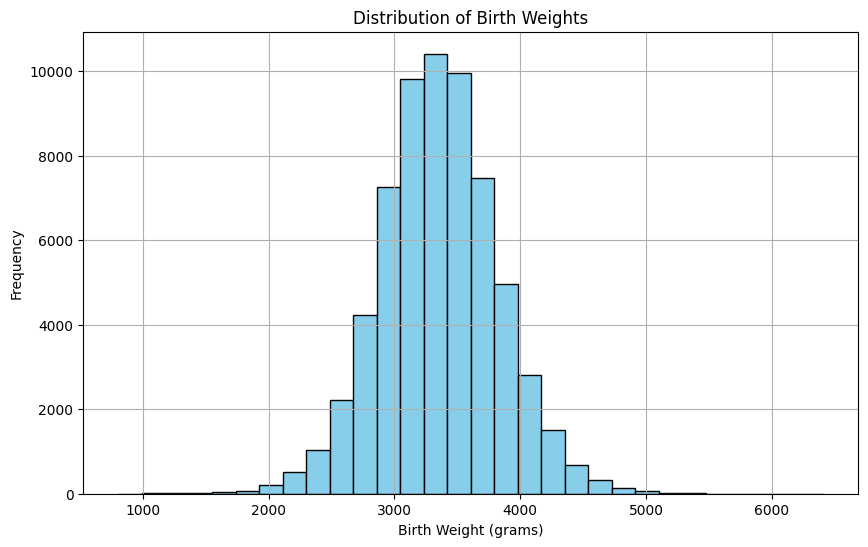

In [67]:
# Create a histogram to visualize the distribution of Birth Weights
plt.figure(figsize=(10, 6))
plt.hist(df['DBWT'], bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of Birth Weights')
plt.xlabel('Birth Weight (grams)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

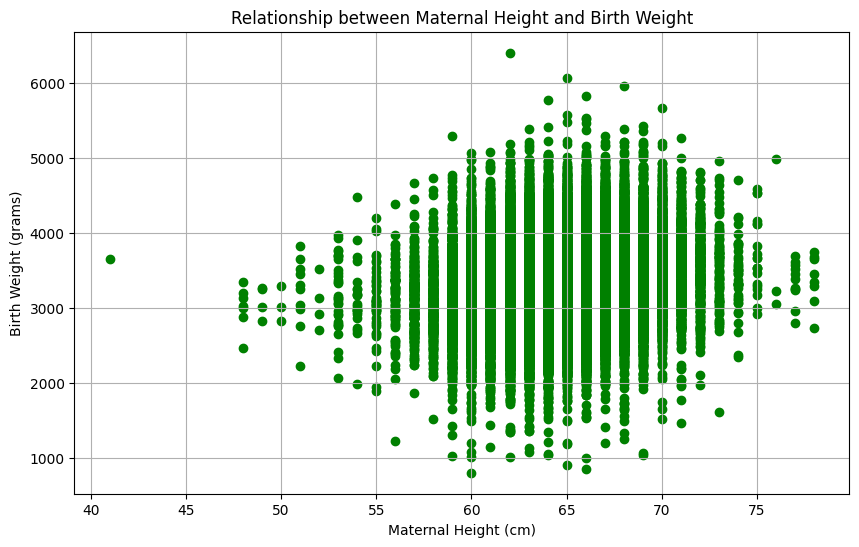

In [69]:
# Assuming the column for maternal height is 'Height'
plt.figure(figsize=(10, 6))
plt.scatter(df['M_Ht_In'], df['DBWT'], color='green')
plt.title('Relationship between Maternal Height and Birth Weight')
plt.xlabel('Maternal Height (cm)')
plt.ylabel('Birth Weight (grams)')
plt.grid(True)
plt.show()